# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb
For this problem set we do not run the bot, so try to debug your solutions with your own simple tests

## Problem 1 (20 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** 
1. To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 
2. If $\mathrm{vec}(X)$ is a rowwise reshape,
$$\mathrm{vec}(AXB)=(A \otimes B^\top) \mathrm{vec}(X).$$


- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).

## Solution 1

- Let's prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$

  Consider matrices $ A^{m \times n}, , X^{n \times p}$ and $B^{p \times q}$.
  We can find kth column of a matrix $(AXB)$ as
  $$
      (AXB)_{k} = A(XB)_{k} = AXB_{k}
  $$
  <br>
  $$
  (AXB)_{k} = A
    \begin{bmatrix}
           x_{11}b_{1k} + x_{12}b_{2k} + & \dots  &x_{1p}b_{pk} \\
            & \vdots &  \\
           x_{n1}b_{1k} + x_{n2}b_{2k} + & \dots  &x_{np}b_{pk}
    \end{bmatrix}=A
    \begin{bmatrix}
        \begin{bmatrix}
        x_{11} \\
        \vdots \\
        x_{n1}
        \end{bmatrix}
        b_{1k}+
        \begin{bmatrix}
            x_{12} \\
            \vdots \\
            x_{n2}
        \end{bmatrix}
        b_{2k}+ \dots+
        \begin{bmatrix}
            x_{1p} \\
            \vdots \\
            x_{np}
        \end{bmatrix}
        b_{pk}
    \end{bmatrix}=
    b_{1k}A
    \begin{bmatrix}
        x_{11} \\
        \vdots \\
        x_{n1}
    \end{bmatrix}+
    b_{2k}A
    \begin{bmatrix}
        x_{12} \\
        \vdots \\
        x_{n2}
    \end{bmatrix}+ \dots+
    b_{pk}A
    \begin{bmatrix}
        x_{1p} \\
        \vdots \\
        x_{np}
    \end{bmatrix}=
    \begin{bmatrix}
        b_{1k}A, \dots, b_{pk}A
    \end{bmatrix}
    \mathrm{vec}(X)=
    (B_{k}^\top \otimes A)\mathrm{vec}(X)
    $$
    So, we found
    $$
        \mathrm{vec}(AXB) =
        \begin{bmatrix}
            B_{1}^\top \otimes A \\
            \vdots \\
            B_{q}^\top \otimes A
        \end{bmatrix}
        \mathrm{vec}(X)=(B^\top \otimes A)\mathrm{vec}(X)
    $$

- Consider $A^{m \times n} and B^{k \times p}$ <br>
    Than naive matvec complexity of $(A \otimes B) x$ is $O(mnkp)$ <br>
    Now let's consider  $X^{n \times p}$ such that $x = vec(X)$ <br>
    From equality given above we have $(A \otimes B) x = vec(AXB^\top)$ <br>
    Complexity of such computation is $O((n + p)mk)$. This estimation is less than the complexity of naive computation. 

- For $A = S_A\Lambda_A S_A^{-1}$, $B = S_B\Lambda_B S^{-1}_B$. Let's find eigenvalues and eigenvectors of $A\otimes   I + I \otimes B$. <br>
  Consider matrix $ S = S_A \otimes S_B $. According to Kronecker product properties $ S^{-1} = S_A^{-1} \otimes   S_B^{-1}$ <br>
  Then, using mixed product property $(A \otimes B)(C \otimes D) = AC \otimes BD$, let's derive
  $$
      S^{-1}(A \otimes I)S = (S_A^{-1} \otimes   S_B^{-1})(A \otimes I)(S_A \otimes S_B) = ((S_A^{-1} A) \otimes (S_B^{-1} I)) \otimes (S_A \otimes S_B) = (S_A^{-1} A S_A) \otimes (S_B^{-1} S_B) = \Lambda_A \otimes I
  $$
  Analogically,
  $$
      (S_A^{-1} \otimes   S_B^{-1})(I \otimes B)(S_A \otimes S_B) = I \otimes \Lambda_B
  $$
  So, 
  $$
      (S_A \otimes S_B)^{-1} (A \otimes I + I \otimes B)(S_A \otimes S_B) = \Lambda_A \otimes I + I \otimes \Lambda_B
  $$
  Matrix $ \Lambda_A \otimes I + I \otimes \Lambda_B $ is diagonal, so matrix $(A \otimes I + I \otimes B)$ is         diagonalizable and has eigenvalue decomposition 
  $$
      (A \otimes I + I \otimes B) = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A \otimes S_B)^{-1},
  $$
  where diagonal elements of $(\Lambda_A \otimes I + I \otimes \Lambda_B)$ are all eigenvalues of $(A \otimes I + I \otimes B)$ and columns of $(S_A \otimes S_B)$ are correponding eigenvectors of $(A \otimes I + I \otimes B)$.

- 
    
    * Richardson iteration<br>
    From lecture 11 <br>  
    $$
        e_k \le q^k e_0
    $$
    So,
    $$
        \frac{\|x_k - x_*\|_2}{\|x_*\|_2} \le q^k
    $$

    $$
        q = \frac{\lambda_{max} - \lambda_{min}}{\lambda_{max} + \lambda_{min}} = \frac{1000 - 10^6}{1000 + 10^6}
    $$

    $$
        q^{k} \ge \epsilon = 10^{-4}
    $$

    $$
        k \ge \frac{-4}{\lg(q)}
    $$

    $$
        k \ge 4605171
    $$
    
    * Chebyshev iteration<br>
    $$
        e_{k+1} <= Cq^ke_0
    $$
    
    $$
        q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1}
    $$
    
    $$
        cond(A) = \frac{\lambda_{max}}{\lambda_{min}} = \frac{10^3 - 1}{10^3 + 1}
    $$
    
    $$
        k \ge \frac{-4}{\lg(q)}
    $$
    
    $$
        k \ge 4605
    $$
    
    * Conjugate gradient method (use 𝐴-norm)<br>
    Expression for upper bound (from lecture 12)
    $$
        \frac{\|x_k - x_*\|_2}{\|x_*\|_2} \le \gamma \Big( \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1} \Big)^k
    $$
    
    Here we consider $\gamma = 2$
    
    $$
        k \ge \frac{-4\lg(2)}{\lg(\frac{999}{1001})}
    $$
    
    $$
        k \ge 4951
    $$

## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.

- The orthoprojection matrix on the space orthogonal to the eigenvector $e = \big( 1  1 \dots 1  1 \big)$
$$
    P = I - \frac{ee^\top}{e^\top e}
$$
$P$ is indeed a projection because
$$
    P^2 = (I - \frac{ee^\top}{e^\top e})(I - \frac{ee^\top}{e^\top e}) = I - 2\frac{ee^\top}{e^\top e} + \frac{e^{\top}(ee^\top)e}{(e^\top e)^2} = I - \frac{ee^\top}{e^\top e} = P
$$
To see that it is a projection on a space orthogonal to the eigenvector $e$:
$$
    e^{\top}(Px) = e^{\top}x - e^{\top}x = 0
$$


* (5 pts) Implement the spectral partitioning as the function ```partition```:

In [1]:
import numpy as np
import scipy as sp
from scipy import sparse

def construct_degree_matrix(A):
    diag = np.zeros(A.shape[0])
    
    for i in range (A.shape[0]):
        diag[i] = A.getrow(i).sum()
    
    spdiag = sp.sparse.diags(diag, 0)
    
    return spdiag

# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    x = x0
    eigs = np.array([0])

    I = sp.sparse.eye(A.shape[0])
    L = construct_degree_matrix(A) - A
    
    for i in range (num_iter_fix):
        
        # orthoprojection
        x = x - np.sum(x) / x0.shape[0]
        
        evect = sp.sparse.linalg.spsolve(L - shift * I, x)
        x = evect / np.linalg.norm(evect, ord=2)
        
        eigv = np.float64((x.T).dot((L.dot(x))))
        eigs = np.append(eigs, eigv)
        
        if (np.abs(eigv - eigs[-2]) / np.abs(eigv) <= eps):
            return x, eigs
        
    for i in range (num_iter_adapt):
        
        x = x - np.sum(x) / x0.shape[0]
        R = np.float64((x.T).dot((L.dot(x))) / ((x.T).dot(x)))
        eigs = np.append(eigs, R)
        
        eigv = sp.sparse.linalg.spsolve(L - R*I, x)
        x = eigv / np.linalg.norm(eigv)

        if (np.abs(R - eigs[-2]) / np.abs(R) <= eps):
            return x, eigs

    
    return x, eigs

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

M = 36
N = 10

G = nx.lollipop_graph(M, N)
pos = nx.spring_layout(G)  #positions of all nodes
A = nx.adjacency_matrix(G)
L = nx.laplacian_matrix(nx.from_scipy_sparse_matrix(A))

w, v = np.linalg.eig(L.toarray())
w_sorted = sorted (w)
eigval_2 = w_sorted[1]
print ("Actual second eigenvalue from linalg.eig: ", eigval_2)

rand_x0 =  np.random.randint(low=5, size = (M + N, )).astype(dtype=np.float)
x, eigs = partition(A, 0.001, 200, 200, rand_x0, 10e-7)
print ("Inverse power method's eigenvalue:        ", eigs[-2])

first_component = np.argwhere(x>0).flatten()
second_component = np.argwhere(x<0).flatten()

nx.draw_networkx_nodes(G, pos,
                       nodelist = list(first_component),
                       node_color = 'r',
                       node_size = 100,
                       alpha = 0.8)

nx.draw_networkx_nodes(G,pos,
                       nodelist = list(second_component),
                       node_color = 'b',
                       node_size = 100,
                       alpha = 0.8)

Actual second eigenvalue from linalg.eig:  0.027236611924065957
Inverse power method's eigenvalue:         0.027236618670509558


In [3]:
rand_x0 =  np.random.randint(low=5, size = (M + N, )).astype(dtype=np.float)
x, eigs = partition(A, 0.001, 0, 100, rand_x0, 10e-7)
print ("Actual second eigenvalue from linalg.eig: ", eigval_2)
print ("Inverse power method's eigenvalue:        ", eigs[-2])

Actual second eigenvalue from linalg.eig:  0.027236611924065957
Inverse power method's eigenvalue:         36.0000081610984


### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.

### Proof

Given a graph $G=(V,E)$. Consider multiplication $Lv$ (where $L$ is a graphs Laplacian matrix). So, i'th entry of $Lv$ is $ \sum\limits_{j:(i,j) \in E} (v(i) - v(j))$. <br> 
Initialy, let's show that the number of zero eigenvalues is not less than the number of of connected components of the graph $G$. Let's assume that $G$ has $k$ connected components, corresponding to the partition of $V$ into disjoint sets $S_1, \dots , S_k$. We can construct $k$ vectors $v_1, \dots, v_k$, such that $v_i(j) = \frac{1}{\sqrt{S_i}}$, if $j \in S_i$ and 0 oth (where $v_i(j)$ is a $j$'th component of $i$'th vector). Consequently, such vectors will satisfy $\|v_i\|_2 = 1$ for $i = 1, ..., k.$ For $i \ne j$ $\big \langle v_i, v_j \big \rangle = 0$ ($S_i$ and $S_j$ are disjoint). Also $Lv_i = 0$, because $Lv_i = \sum\limits_{j:(i,j) \in E} (v(i) - v(j))$ and $v_i(j) = v_i(r) = \sqrt{S_i}, (r,j) \in E$.  So, we have a set of $k$ orthonormal vectors that are all eigenvectors of $L$ with eigenvalue $0$. <br>
Now let's prove that the number of 0 eigenvalues is not greater than the number of connected components of graph. Firstly, note, that $v_i^\top Lv_i = \sum\limits_{i < j:(i,j) \in E} (v(i) - v(j))^2$ will be a zero only if $v$ is constant on every connected component. Let's show that it's impossible to find a $k + 1$'st vector $v$ corresponding to zero eigenvalue and orthogonal to $v_1, \dots, v_k$. Any eigenvector $v$ must be nonzero in some coordinate. Let's assume $v$ is nonzero on acoordinate in set $S_i$, so $v(j) \ne 0$ and constant on all $j \in S_i$. But in this case $\big \langle v, v_i \big \rangle \ne 0$. So, $v$ is not orthogonal to $v_i$. Therefore, it's impossible to find $k + 1$'st vector $v$ corresponding to zero eigenvalue. <br>
Finally, we proved that the number of zero eigenvalues of the Laplacian equals the number of connected components of the corresponding graph.

* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

Actual second eigenvalue from linalg.eig:  0.04370479853238864
Algebraic connectivity of cycle graph:     0.04370483734575725


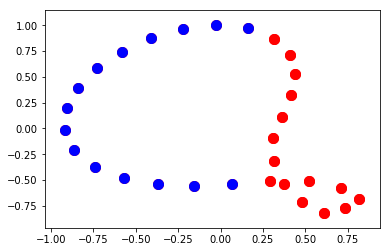

In [4]:
n = 30
G_cyclic = nx.cycle_graph(n)
pos_cyclic = nx.spring_layout(G_cyclic)
A_cyclic = nx.adjacency_matrix(G_cyclic)
L_cyclic = nx.laplacian_matrix(nx.from_scipy_sparse_matrix(A_cyclic))
nx.draw_networkx_nodes(G_cyclic, pos_cyclic,
                       nodelist = list(range(n)),
                       node_color = 'r',
                       node_size = 100)

w, v = np.linalg.eig(L_cyclic.toarray())
w_sorted = sorted (w)
eigval_2 = w_sorted[1]
print ("Actual second eigenvalue from linalg.eig: ", eigval_2)

rand_x0 =  np.random.randint(low=5, size = (n, )).astype(dtype=np.float)
x, eigs = partition(A_cyclic, 0.001, 200, 200, rand_x0, 10e-7)
print ("Algebraic connectivity of cycle graph:    ", eigs[-2])

nx.draw_networkx_nodes(G_cyclic, pos_cyclic,
                       nodelist = list(np.argwhere(x>0).flatten()),
                       node_color = 'r',
                       node_size = 100)

nx.draw_networkx_nodes(G_cyclic,pos_cyclic,
                       nodelist = list(np.argwhere(x<0).flatten()),
                       node_color = 'b',
                       node_size = 100)

Actual second eigenvalue from linalg.eig:  (29.99999999999998+0j)
Algebraic connectivity of cycle graph:     30.00000000000001


/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


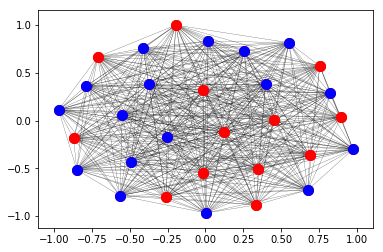

In [5]:
G_complete = nx.complete_graph(n)
pos_complete = nx.spring_layout(G_complete)
A_complete = nx.adjacency_matrix(G_complete)
L_complete = nx.laplacian_matrix(nx.from_scipy_sparse_matrix(A_complete))
nx.draw_networkx_nodes(G_complete, pos_complete,
                       nodelist = list(range(n)),
                       node_color = 'r',
                       node_size = 100)
nx.draw_networkx_edges(G_complete, pos_complete, width=0.2)

w, v = np.linalg.eig(L_complete.toarray())
w_sorted = sorted (w)
eigval_2 = w_sorted[1]
print ("Actual second eigenvalue from linalg.eig: ", eigval_2)

rand_x0 =  np.random.randint(low=5, size = (n, )).astype(dtype=np.float)
x, eigs = partition(A_complete, 0.001, 200, 200, rand_x0, 10e-7)
print ("Algebraic connectivity of cycle graph:    ", eigs[-2])

nx.draw_networkx_nodes(G_complete, pos_complete,
                       nodelist = list(np.argwhere(x>0).flatten()),
                       node_color = 'r',
                       node_size = 100)

nx.draw_networkx_nodes(G_complete,pos_complete,
                       nodelist = list(np.argwhere(x<0).flatten()),
                       node_color = 'b',
                       node_size = 100)

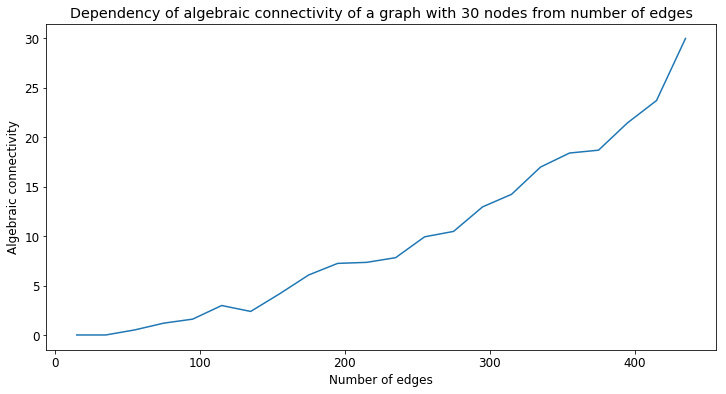

In [6]:
import matplotlib.pyplot as plt

edges = np.array([])
alg_connectivity = np.array([])

N = 30

m = N/2
while (m <= N*(N-1)/2):
    
    G = nx.gnm_random_graph(N, m)
    A = nx.adjacency_matrix(G)
    rand_x0 =  np.random.randint(low=5, size = (N, )).astype(dtype=np.float)
    x, eigs = partition(A, 0.001, 200, 200, rand_x0, 10e-7)
    
    edges = np.append(edges, m)
    alg_connectivity = np.append(alg_connectivity, eigs[-2])
    m += 20
    
fig = plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = 12
plt.plot(edges, alg_connectivity)
plt.ylabel("Algebraic connectivity")
plt.xlabel("Number of edges")
plt.title("Dependency of algebraic connectivity of a graph with 30 nodes from number of edges")
plt.show()

#### The results proved that graph with bigger algebraic connectivity has more edges (number of vertices is fixed).

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

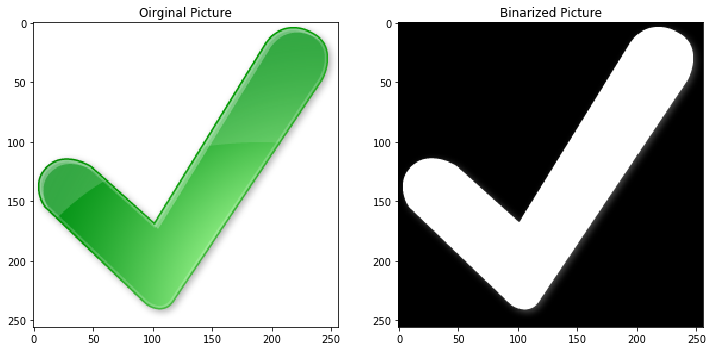

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import requests
import numpy as np

url = 'https://cdn.icon-icons.com/icons2/10/PNG/256/check_ok_accept_apply_1582.png'
img_raw = Image.open(requests.get(url, stream=True).raw)
img = np.array(img_raw).astype(np.uint8)

img = img[:,:,3]
binarized = np.zeros(img.shape).astype(dtype=np.int)
binarized[img >= 1] = 1

fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

plt.subplot(1, 2, 1)
plt.imshow(np.array(img_raw).astype(np.uint8))
plt.title('Oirginal Picture')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('Binarized Picture')

plt.show()

Text(0.5, 1.0, 'Partition of the picture')

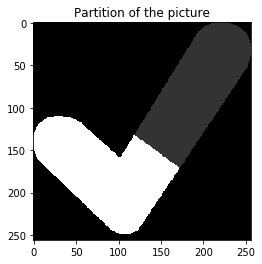

In [8]:
import networkx as nx

# INPUT:
# bin_img - binarized image
# OUTPUT:
# G - 8-connected graph constructed from bin_img
# structure of 8-neighbour, '*' is currently processed pixel, 'x' is a neighbour pixels
# as noted here http://www.cse.iitm.ac.in/~vplab/courses/CV_DIP/PDF/NEIGH_CONN.pdf
# x x x 
# x * x
# x x x
# A - adjacency matrix of G
def construct_adj_matrix_from_bin_img(bin_img):
    
    G = nx.Graph()
    
    vertices = np.zeros(bin_img.shape)   
    vert_idxs = bin_img.nonzero()
    vertices[vert_idxs] = np.arange(1, np.count_nonzero(bin_img) + 1, 1)
    vertices = vertices.astype(dtype=np.int)
    
    G.add_nodes_from(list(vertices[vert_idxs]))
    
    i_bound = bin_img.shape[0]
    j_bound = bin_img.shape[1]
    
    idx_i, idx_j = vert_idxs
    processing_grid = list(zip(idx_i, idx_j))
    
    for i, j in processing_grid:
        neighbours_8 = vertices[np.maximum(i - 1, 0) : np.minimum(i + 2, i_bound), np.maximum(j - 1, 0): np.minimum(j + 2, j_bound)]
        
        neig_pixels = neighbours_8[neighbours_8 != 0]
        for neigh in neig_pixels:
            G.add_edge(vertices[i, j], neigh)
    
    A = nx.adjacency_matrix(G)
    
    return G, A
                
G, A = construct_adj_matrix_from_bin_img(binarized)
n = A.shape[0]
rand_x0 =  np.random.randint(low=5, size = (n, )).astype(dtype=np.float)
x, eigs = partition(A, 0.0001, 100, 10, rand_x0, 1e-7)

#partition = np.signbit(x)
binarized[binarized.nonzero()] += 4 * np.signbit(x)

plt.imshow(binarized, cmap='gray')
plt.title('Partition of the picture')

### We processed summation of our graph's 'pixels' with sign values (true if +, false is -) in Fiedler's vector to show two components one with values $1 + 1 = 2$  and  other with $1 + 0 = 0$.  It's obvious from the result that we are managed to separate two components in the corresponding graph.

In [9]:
#pos = nx.spring_layout(G)
#nx.draw_networkx_nodes(G, pos,
#                       nodelist = list(np.argwhere(x>0).flatten()),
#                       node_color = 'r',
#                       node_size = 100)
#nx.draw_networkx_nodes(G,pos,
#                       nodelist = list(np.argwhere(x<0).flatten()),
#                       node_color = 'b',
#                       node_size = 100)

## Problem 3 (30 pts)

### Say hi to the drone

You received a radar-made air scan data of a terrorist hideout made from a heavy-class surveillance drone. Unfortunately, it was made with an old-fashioned radar, so the picture is convolved with the diffractive pattern. You need to deconvolve the picture to recover the building plan.

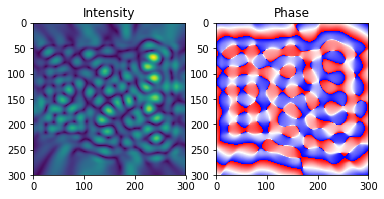

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import hankel2
radiointel = np.load('radiointel.npy')
plt.subplot(1,2,1)
plt.imshow( np.abs(radiointel) )
plt.title('Intensity')
plt.subplot(1,2,2)
plt.imshow( np.angle(radiointel), cmap='bwr' )
plt.title('Phase')
plt.show()

In this problem you asked to use using FFT-matvec and make the convolution operator for the picture of the size $N\times N$, where $N=300$ with the following kernel (2D Helmholtz scattering):
$$
   G_{\overline{i_1 j_1}, \overline{i_2 j_2} } = \frac{-1j}{4} H^{(2)}_0 \left( k_0 \cdot \Delta r_{\overline{  i_1 j_1  } , \overline{ i_2 j_2}  } \right), \quad i_1,j_1, i_2, j_2 = 0,\dots, N-1 $$

except when both $i_1=i_2$ and $j_1 = j_2$. 

In that case set $$G_{i_1=i_2, j_1=j_2} = 0$$.

Here
$1j$ is the imaginary unit, $H^{(2)}_0(x)$ - (complex-valued) Hankel function of the second kind of the order 0. See 'scipy.special.hankel2'.

$$ \Delta r_{\overline{  i_1 j_1  } , \overline{ i_2 j_2}  } = h \sqrt{  (i_1-i_2)^2 + (j_1-j_2)^2  } $$
$$ h = \frac{1}{N-1}$$
$$k_0 = 50.0$$



See https://github.com/oseledets/nla2018/blob/master/lectures/lecture-15.ipynb for the recipe.

For the kernel array, there is a following element correspondence with BTTB matrix G:

$$eG_{i_1-i_2, j_1 - j_2} \equiv np.roll(np.roll( G_{\overline{i_1 j_1}, \overline{i_2 j_2} }    ,-N, axis=1),-N, axis=0)$$


### Tasks:

1. Create the complex-valued kernel $eG$ ($2N-1 \times 2N-1$)-sized matrix according with the instructions above. Note that at the point where $\Delta r=0$ value of $eG$ should be manually zet to zero. Store in the variable eG. Plot the eG.real of it with plt.imshow

2. Write function `Gx` that calculates matvec of $G$ by a given vector $x$. Make sure all calculations and arrays are in dtype=np.complex64. 

Hint 1: matvec with a discrete delta function (vector of all zeros with one lone 1.0 somewhere) should return a kernel function centered on the location of the delta function. If this doesn't happen, something is wrong.

Hint 2: As shown in the lecture slides, kernel eG should be cyclically shifted on both dimensions (np.roll), such that the center of the Green's function is located at eG[0,0] to work properly inside fft2 function.

3. What is the complexity of one matvec? 
4. Use `scipy.sparse.linalg.LinearOperator`  to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.
5. Write a function that takes an appropriate Krylov method(s) and solves linear system $Gx=b$ to deconvolve `radiointel`. The result should be binary mask array (real, integer, of 0s and 1s) of the plane of the building. Make sure it converged sufficiently and you did the post-processing properly. Plot the result as an image. 
    
    
**Note:** You can use standart fft and ifft from e.q. `numpy.fft`



### 1. Kernel (5 pts)

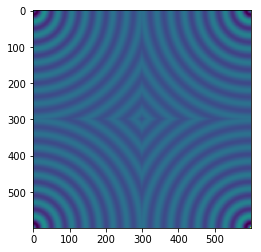

In [11]:
k0 = 50.0
N = 300

def make_eG(k0, N):
    # INPUT:  
    # k0 #dtype = float
    # N #dtype = int
    
    # OUTPUT:
    # np.array, shape = (2N-1, 2N-1), dtype = np.complex64
    
    h = 1/(N - 1)
    
    index_i = (np.arange(-N + 1, N, 1)).astype(dtype=np.complex64)
    index_j = index_i
    
    idx_i, idx_j = np.meshgrid(np.square(index_i), np.square(index_j))
    
    G = (-1j/4) * hankel2(0, k0 * h * np.sqrt(idx_i + idx_j))
    
    #x = np.sqrt(idx_i + idx_j)
    #print (np.where(x == 0))
    
    # i1 = i2, j1 = j2
    G[N-1, N-1] = 0
    
    eG = np.roll(np.roll(G, -N, axis=1), -N, axis=0)
    
    return eG.astype(dtype=np.complex64)

eG = make_eG(k0=k0, N=N)

plt.imshow(eG.real)

### 2. Matvec (5 pts)

In [12]:
def Gx(x, eG):
    # input:  
    # x, np.array, shape=(N**2, ), dtype = np.complex64
    # eG, np.array, shape=(2N-1, 2N-1), dtype = np.complex64
    # output:
    # matvec, np.array, shape = (N**2, ), dtype = np.complex64
    N = int(np.sqrt(x.shape[0]))
    
    x = x.astype(dtype=np.complex64)
    x_mult = x.reshape((N, N))
    x_pad = (np.zeros((N + N - 1, N + N -1))).astype(dtype=np.complex64)
    x_pad[:x_mult.shape[0], :x_mult.shape[1]] = x_mult
    
    matvec_mult = np.fft.ifft2(np.fft.fft2(eG) * np.fft.fft2(x_pad))[0:N,0:N]
    matvec = matvec_mult.reshape(N**2, 1)
    
    return matvec.astype(dtype=np.complex64)

### 3. Complexity (3 pts)

Big-O complexity of one matvec operation is $O(N^2 \log N)$ <br>
It can be shown via results of lecture 15. We know that 1 demensional fft has complexity $O(N \log N)$.<br>
In our case we apply fft to 2 dimensional vector (by rows and columns). Therefore, have $O(2 NN \log N)$ = $O(N^2 \log N)$

### 4. LinearOperator (2 pts)

In [13]:
from  scipy.sparse.linalg import LinearOperator

L_Gx = LinearOperator((N ** 2, N ** 2), matvec=lambda x, eG=eG: Gx(x, eG=eG))

### 5. Reconstruction (15pts)

Text(0.5, 1.0, 'Convergence')

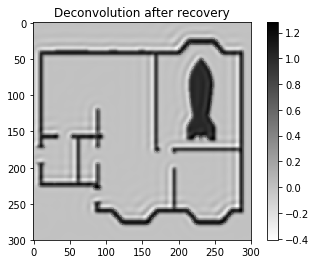

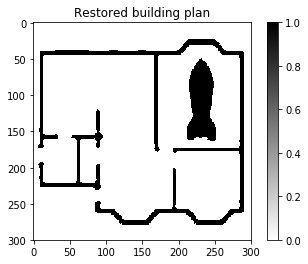

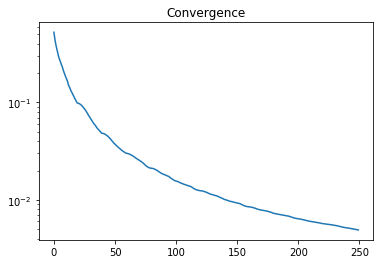

In [14]:
from scipy.sparse.linalg import gmres
from scipy.sparse.linalg import bicgstab

def normalize(mask): #proper normalization to binary mask
    mask = np.clip(mask, a_min=0, a_max=1)
    mask = np.round(mask)
    mask = np.asarray(mask, dtype=int)
    return mask

errs=[]
def callback(err): #callback function to store the history of convergence
    global l
    errs.append(err)
    return 

b = radiointel.reshape(N**2, 1).astype(dtype=np.complex64)
mask, inf = gmres(L_Gx, b, maxiter = 250, callback = callback)
#mask, inf = bicgstab(L_Gx, radiointel.reshape(N**2,1), maxiter=maxiter, callback = callback)

plt.figure()
plt.imshow( (mask.real).reshape(N,N) , cmap='binary')
plt.title('Deconvolution after recovery')
plt.colorbar()


plt.figure()
plt.imshow( (normalize(  mask.real )).reshape(N,N) , cmap='binary')
plt.title('Restored building plan')
plt.colorbar()

plt.figure()
plt.semilogy(errs)
plt.title('Convergence')